## **Examen de cinturón AML – Opción C**

En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

### **Dataset:**

El dataset utilizado es el «Human Activity Recognition with Smartphones Dataset», que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.
**Enlace al dataset:** https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

### **Instrucciones:**
#### **1. Exploración y preprocesamiento de datos:**
- Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.
- Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

#### **2. Análisis no supervisado:**
- Selecciona un enfoque de análisis no supervisado: K-means o PCA.
- K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.
- PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

#### **3. Modelado con MLP:**
- Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.
- Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.
- Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

#### **4. Evaluación del modelo:**
- Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
- Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

#### **5. Discusión y análisis:**
- Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
- Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

#### **6. Entrega final:**
- Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.


**Diccionario de Datos**
| **Clave**        | **Descripción**                                             | **Tipo de dato** |  
|-------------------|-------------------------------------------------------------|------------------|  
| **Señales Temporales** |                                                             |                  |  
| tBodyAccX         | Componente de aceleración del cuerpo en el eje X            | Float            |  
| tBodyAccY         | Componente de aceleración del cuerpo en el eje Y            | Float            |  
| tBodyAccZ         | Componente de aceleración del cuerpo en el eje Z            | Float            |  
| tGravityAccX      | Componente de aceleración gravitacional en el eje X         | Float            |  
| tGravityAccY      | Componente de aceleración gravitacional en el eje Y         | Float            |  
| tGravityAccZ      | Componente de aceleración gravitacional en el eje Z         | Float            |  
| tBodyGyroX        | Componente de velocidad angular del cuerpo en el eje X      | Float            |  
| tBodyGyroY        | Componente de velocidad angular del cuerpo en el eje Y      | Float            |  
| tBodyGyroZ        | Componente de velocidad angular del cuerpo en el eje Z      | Float            |  
| **Magnitudes Vectoriales** |                                                     |                  |  
| tBodyAccMag       | Magnitud vectorial de la aceleración del cuerpo             | Float            |  
| tGravityAccMag    | Magnitud vectorial de la aceleración gravitacional          | Float            |  
| tBodyGyroMag      | Magnitud vectorial de la velocidad angular del cuerpo       | Float            |  
| **Transformaciones en Frecuencia** |                                             |                  |  
| fBodyAcc          | Señales transformadas de aceleración mediante Fourier       | Float            |  
| fBodyGyro         | Señales transformadas de giroscopio mediante Fourier        | Float            |  
| **Identificadores y Actividades** |                                              |                  |  
| SubjectID         | Identificador único para cada sujeto del experimento        | Int              |  
| Activity          | Tipo de actividad realizada por los sujetos                | String           |  
| **Tipos de Actividades** |                                                      |                  |  
| Walking           | Caminar                                                    |                  |  
| Walking_Upstairs  | Subir escaleras                                             |                  |  
| Walking_Downstairs| Bajar escaleras                                             |                  |  
| Sitting           | Sentarse                                                   |                  |  
| Standing          | Estar de pie                                               |                  |  
| Laying            | Acostarse                                                  |                  |  

Base de datos de Reconocimiento de Actividades Humanas construida a partir de los registros de 30 sujetos realizando actividades de la vida diaria (ADL) mientras llevaban un teléfono inteligente con sensores inerciales integrados, montado en la cintura.

Información Adicional de las Variables

Para cada registro en el conjunto de datos se proporciona:

- Aceleración triaxial del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
- Velocidad angular triaxial del giroscopio.
- Un vector de 561 características con variables en los dominios de tiempo y frecuencia.
- La etiqueta de la actividad.
- Un identificador del sujeto que realizó el experimento.

### **Librerias y Datasets**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import utils
import kagglehub

In [2]:

# Descargar el dataset
path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")
print("Path to dataset files:", path)
# Cargar el dataset
dataset_path = os.path.join(path, "train.csv")
df = pd.read_csv(dataset_path)

# Cargar el archivo test.csv
test_dataset_path = os.path.join(path, "test.csv")
df_test = pd.read_csv(test_dataset_path)

Path to dataset files: C:\Users\guill\.cache\kagglehub\datasets\uciml\human-activity-recognition-with-smartphones\versions\2


### **Exploratory Data Analysis**

Visualizamos las primeras 10 columnas para poder entender mejor el dataset

In [3]:
df.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


Mediante el .info() podemos ver los dtypes correspondientes

In [4]:
# Ver toda la información de las columnas como una lista
info = df.info()  # Esto imprime información sobre el DataFrame, pero no retorna una lista

# Si necesitas convertir los nombres de las columnas a una lista, usa:
columnas = df.columns.tolist()
columnas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

De las 563 columnas, solo hay 1 int y 1 object, el resto son float.

Visualizamos la columna subject

In [5]:
# Filtrar columnas de tipo object
columnas_subjet = df.subject

# Mostrar las primeras filas de las columnas filtradas
columnas_subjet

0        1
1        1
2        1
3        1
4        1
        ..
7347    30
7348    30
7349    30
7350    30
7351    30
Name: subject, Length: 7352, dtype: int64

In [6]:
columnas_subjet.unique()


array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

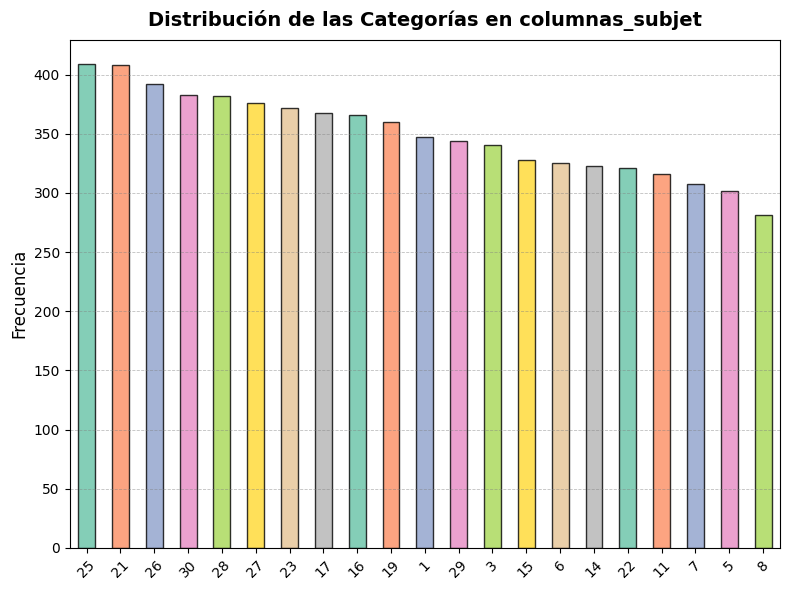

In [7]:
utils.plot_column_distribution(columnas_subjet, 
                         top_n=30, 
                         figsize=(8, 6), 
                         palette="Set2", 
                         title="Distribución de las Categorías en columnas_subjet")


Visualizamos la columna object

In [8]:
# Filtrar columnas de tipo object
columnas_object = df.select_dtypes(include=['object'])

# Mostrar las primeras filas de las columnas filtradas
columnas_object


,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
7347,WALKING_UPSTAIRS
7348,WALKING_UPSTAIRS
7349,WALKING_UPSTAIRS
7350,WALKING_UPSTAIRS


Usando .unique() veremos cuales son los valores de la columna objetc

In [9]:
# Valores unicos mediante for
for col in columnas_object:
    print(f"Columna: {col}")
    print(f"Valores unicos: {df[col].unique()}")
    print()


Columna: Activity
Valores unicos: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']



Se observan 6 tipos, las cuales estan definidas en nuestro diccionario de datos, no se observan inconsistencias, se decide mantener como esta

 Convertimos a su Dtype correspondiente, en este caso category

In [10]:
# Convertir la columna 'Activity' de object a category
df['Activity'] = df['Activity'].astype('category')


Graficamos la distribucion de la columna category

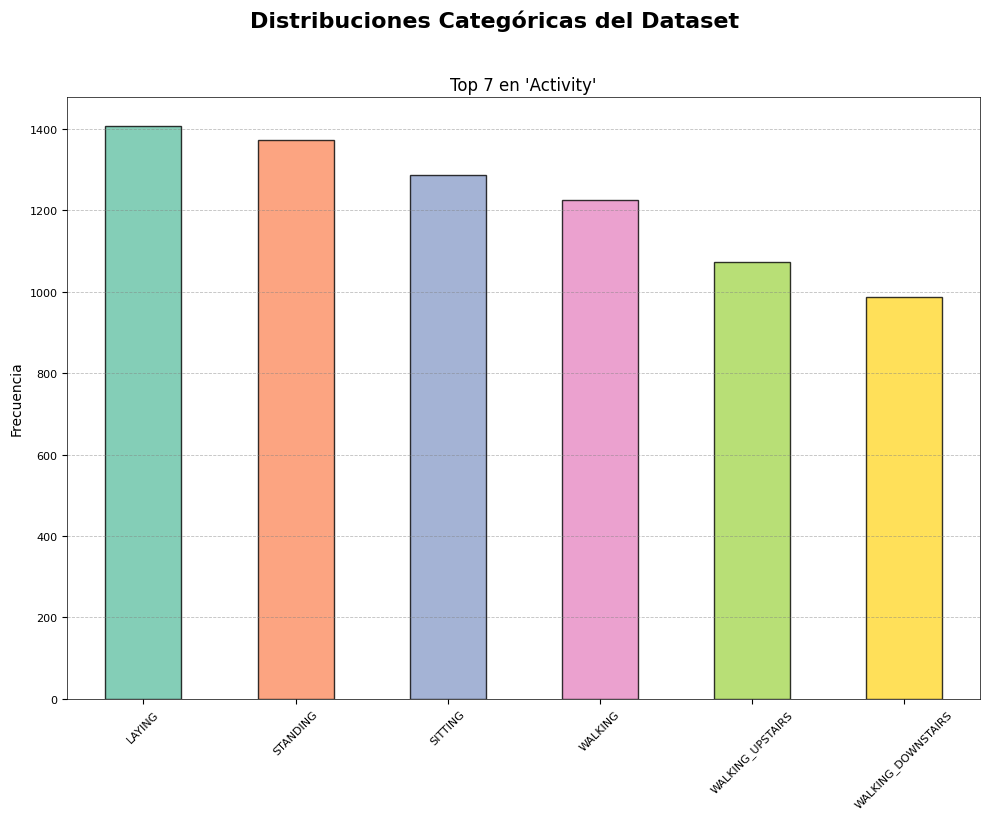

In [11]:
categorical_plot = utils.plot_categorical_distributions(
    df,               # DataFrame con los datos a graficar
    figsize=(10, 8),    # Tamaño de la figura (ancho x alto)
    nrows=1,            # Número de filas en la cuadrícula de subplots
    ncols=1,             # Número de columnas en la cuadrícula de subplots
    color=None,          # Deja color en None para usar la paleta
    palette="Set2",      # Paleta Set2 para barras
    edgecolor="black",   # Color del borde de las barras
    top_n=7,             # Mostrar las 7 categorías más frecuentes
    title="Distribuciones Categóricas del Dataset"  # Título de la figura
)


- Los valores muestran que **LAYING** y **STANDING** son las categorías más frecuentes, con aproximadamente 1400 y 1200 observaciones, respectivamente. Estas actividades representan comportamientos sedentarios o de reposo.


- **WALKING** tiene una frecuencia ligeramente inferior a **STANDING**, lo que indica una presencia moderada de actividades de movimiento. 


- Las categorías **WALKING_UPSTAIRS** y **WALKING_DOWNSTAIRS** tienen una frecuencia más baja, lo que sugiere que las actividades de desplazamiento vertical (subir y bajar escaleras) ocurren con menor frecuencia en el conjunto de datos.

Usando .value_counts() podemos saber cuantas filas corresponden a cada categoria

In [12]:
activity_counts = df['Activity'].value_counts()
activity_counts

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

#### **Estadisticas descriptivas**

In [13]:
df.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
tBodyAcc-std()-Z,7352.0,-0.604754,0.418687,-1.000000,-0.980233,-0.859365,-0.262415,1.000000
tBodyAcc-mad()-X,7352.0,-0.630512,0.424073,-1.000000,-0.993591,-0.950709,-0.292680,1.000000
tBodyAcc-mad()-Y,7352.0,-0.526907,0.485942,-1.000000,-0.978162,-0.857328,-0.066701,0.967664
tBodyAcc-mad()-Z,7352.0,-0.606150,0.414122,-1.000000,-0.980251,-0.857143,-0.265671,1.000000
tBodyAcc-max()-X,7352.0,-0.468604,0.544547,-1.000000,-0.936219,-0.881637,-0.017129,1.000000


Podemos observar que existen 7352 filas.
El minimo suele rondar en -1, el maximo  en 1.

**Métricas estadísticas** (cuenta, media, desviación estándar, percentiles, mínimo, máximo) para las características de aceleración en los ejes X, Y, Z de un conjunto de datos.

- **Valores de tendencia central (Media y Mediana):** La media y mediana de la mayoría de las características varían de valores negativos a cercanos a cero. Las medias para las características relacionadas con los ejes X, Y, Z tienden a ser cercanas a cero, lo que indica una distribución centrada alrededor de este valor, pero con una ligera inclinación negativa.
- **Desviación estándar (std):** Los valores de la desviación estándar son relativamente altos, indicando una gran dispersión en los datos para las variables de aceleración, lo cual es común en sensores que capturan movimientos complejos.
Mínimos y Máximos:

- Los **valores mínimos y máximos** varían considerablemente, especialmente con valores extremos de -1 o 1 en algunas características. Estos valores extremos podrían representar posibles anomalías o simplemente las limitaciones del rango de los sensores.
- **Percentiles (25%, 50%, 75%):** Los percentiles muestran una distribución asimétrica en algunas características. Por ejemplo, en "tBodyAcc-mean()-X", el percentil 25% es mayor que la media, lo que sugiere que la mayor parte de los datos están por encima de la media.
- **Valores adicionales:** Algunas características como "tBodyAcc-energy()-X", "tBodyAcc-energy()-Y", y "tBodyAcc-energy()-Z" tienen medias negativas, lo que es coherente con la naturaleza de los datos (sensores de movimiento en condiciones específicas), pero los valores negativos también pueden indicar un factor relacionado con la normalización o el procesamiento de los datos.

#### **Verificacion de NaN**

In [14]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
Activity,7352,0,0.0
tBodyAcc-mean()-X,7352,0,0.0
tBodyAcc-mean()-Y,7352,0,0.0
fBodyBodyGyroJerkMag-sma(),7352,0,0.0
fBodyBodyGyroJerkMag-min(),7352,0,0.0
...,...,...,...
tBodyAcc-mad()-Y,7352,0,0.0
tBodyAcc-mad()-X,7352,0,0.0
tBodyAcc-std()-Z,7352,0,0.0
tBodyAcc-std()-Y,7352,0,0.0


Al parecer no existe ningun valor nulo

#### **Analisis de duplicados**

In [15]:
duplicados = df.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 0


No se observan duplicados

#### **Analisis de Outliers**

In [16]:
# Crear una lista para almacenar los resultados temporales
summary_list = []

for column in df.select_dtypes(include=[np.number]):
    outliers = utils.detect_outliers_iqr(df[column])
    summary_list.append({
        'Column': column,
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    })

# Convertir la lista de diccionarios en un DataFrame
outliers_summary = pd.DataFrame(summary_list).set_index('Column')

# Ordenar de mayor a menor por 'Number of Outliers'
outliers_summary_sorted = outliers_summary.sort_values(by='Number of Outliers', ascending=False)

outliers_summary_sorted.head(20)


,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Column,,,,
tBodyAccJerk-mean()-X,2778,37.785637,0.022467,0.132153
tBodyGyro-mean()-X,2369,32.222524,-0.092539,0.038716
tBodyGyroJerk-mean()-X,2246,30.549510,-0.171188,-0.026367
tBodyAccJerk-mean()-Y,2236,30.413493,-0.090606,0.106096
tBodyGyroJerk-mean()-Y,2187,29.747008,-0.109169,0.024553
tBodyAccJerk-mean()-Z,2022,27.502720,-0.114201,0.107971
tBodyGyroJerk-mean()-Z,1994,27.121872,-0.146882,0.036385
tBodyGyro-mean()-Y,1801,24.496736,-0.180517,0.025070
tBodyAcc-mean()-X,1795,24.415125,0.224801,0.326680


En el dataset, se evidencian muchos outliers, esto puede ser normal porque estamos tratando con sensores, por ende no vamos a eliminar nada.

### **PCA**

El Análisis de Componentes Principales (PCA) es un método de reducción de dimensionalidad que transforma un conjunto de variables posiblemente correlacionadas en un conjunto de nuevas variables no correlacionadas llamadas componentes principales. Estas componentes se ordenan de forma que la primera captura la mayor cantidad posible de varianza, la segunda captura la siguiente mayor cantidad, y así sucesivamente.

Creamos una copia para no modificar el dataset original

In [17]:
data = df.copy()

Las variables del dataset se encuentran en un rango entre -1 y 1, esto podria indicar que los datos estan normalizados, aun asi, como son muchas columnas y no podemos verificar uno por uno, procedemos a usar el **StandarScaler()** para poder ahorrarnos el trabajo de inspeccion.

In [18]:
# Separar las características y la variable objetivo
X = data.drop(columns=["Activity"]) #Variables predictoras
y = data["Activity"] #Variable objetivo

# Dividir en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA para capturar el 90% de la varianza explicada
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Información sobre los componentes principales
print("Varianza explicada acumulada:", pca.explained_variance_ratio_.sum())
print("Número de componentes principales:", X_train_pca.shape[1])

Varianza explicada acumulada: 0.900354750035822
Número de componentes principales: 63


La suma de las varianzas explicadas por los componentes principales seleccionados es 0.90, lo que significa que los primeros componentes principales explican aproximadamente el 90% de la variabilidad de los datos originales. Esto es bueno porque indica que la mayoría de la información de los datos originales se conserva en los componentes seleccionados.

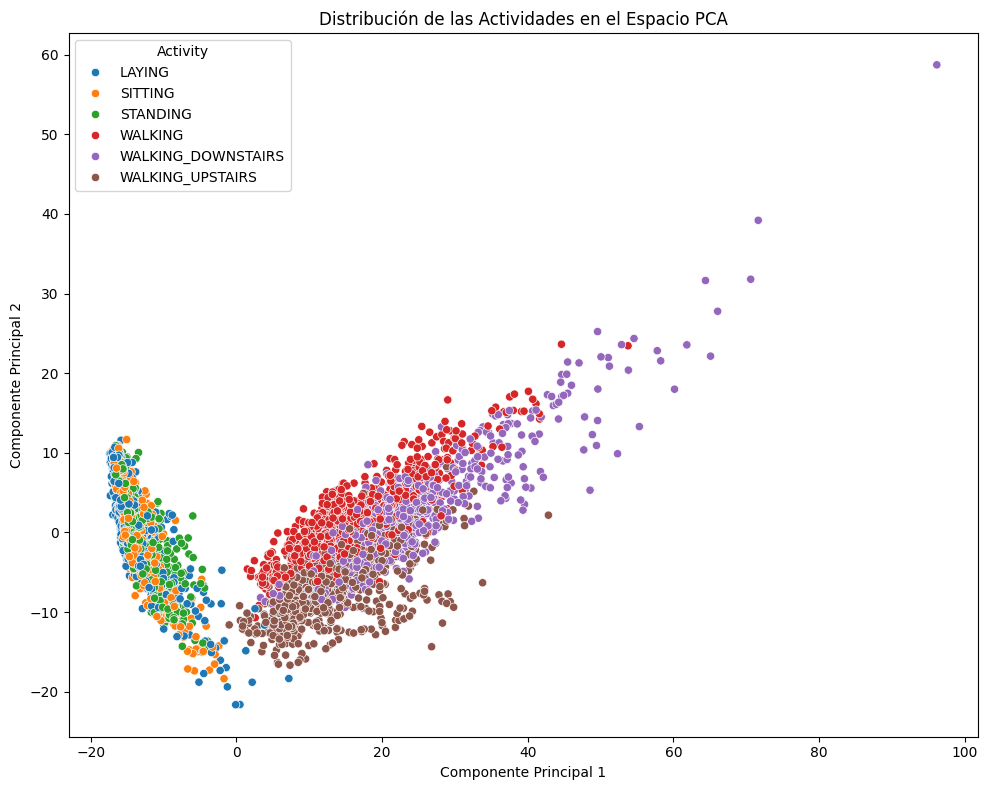

In [19]:
# Graficar las dos primeras componentes principales usando seaborn
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=X_train_pca[:, 0], 
                          y=X_train_pca[:, 1], 
                          hue=y_train, 
                          palette='tab10', 
                          alpha=1)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Distribución de las Actividades en el Espacio PCA')
plt.tight_layout()
plt.show()

Se observa una diferencia entre las actividades **Laying, Sitting, Standing**, estos indican situaciones de reposo o poca movilidad. Esto podría tener implicaciones en la interpretación del comportamiento humano en contextos donde el movimiento es menos frecuente, como en entornos controlados o estudios de actividad física en reposo.

**WALKING y sus subcategorías**, tienden a ser más variables y conllevan un mayor desafío para los modelos de clasificación, debido a la diversidad de patrones asociados a diferentes tipos de movimiento (por ejemplo, caminar, subir o bajar escaleras)

**PCA aplicado en 3 dimensiones**

Varianza explicada por cada componente:
CP1: 50.66%
CP2: 6.59%
CP3: 2.82%
Varianza total explicada: 60.08%


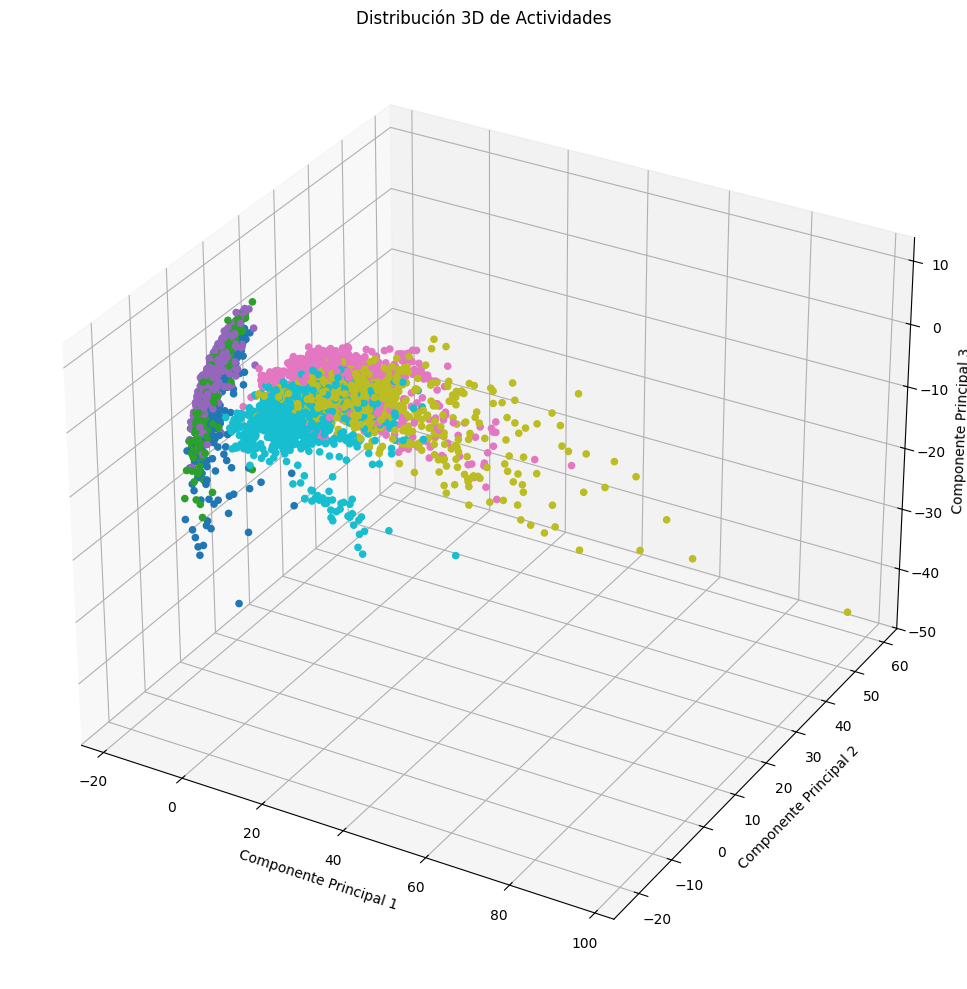

In [20]:
# Asegurarse de tener 3 componentes en PCA
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train_scaled)

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Crear el gráfico de dispersión en 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Crear scatter plot 3D con diferentes colores para cada actividad
scatter = ax.scatter(X_train_pca_3d[:, 0], 
                     X_train_pca_3d[:, 1], 
                     X_train_pca_3d[:, 2], 
                     c=y_train_encoded, 
                     cmap='tab10', 
                     alpha=1)

# Añadir etiquetas y título
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Distribución 3D de Actividades')


# Mostrar porcentaje de varianza explicada
print("Varianza explicada por cada componente:")
print(f"CP1: {pca_3d.explained_variance_ratio_[0]*100:.2f}%")
print(f"CP2: {pca_3d.explained_variance_ratio_[1]*100:.2f}%")
print(f"CP3: {pca_3d.explained_variance_ratio_[2]*100:.2f}%")
print(f"Varianza total explicada: {np.sum(pca_3d.explained_variance_ratio_)*100:.2f}%")

plt.tight_layout()
plt.show()

**Análisis de varianza explicada**

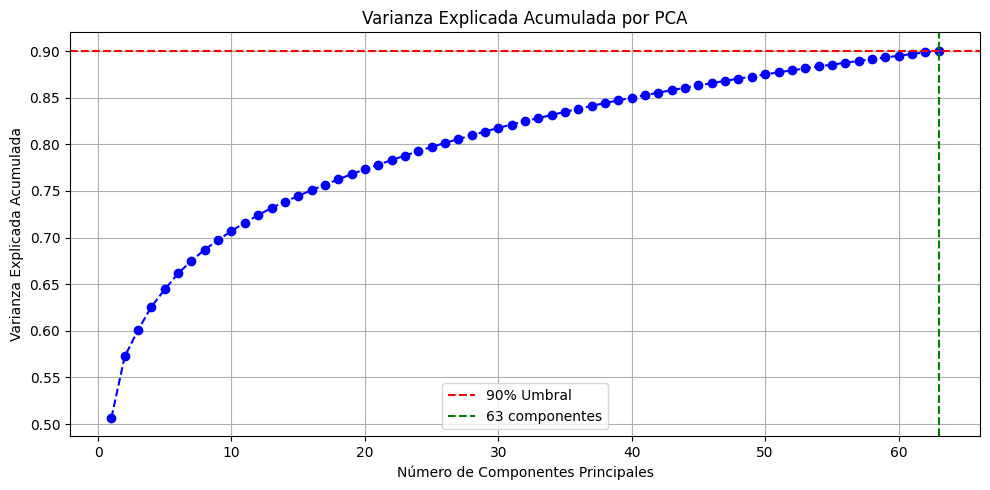

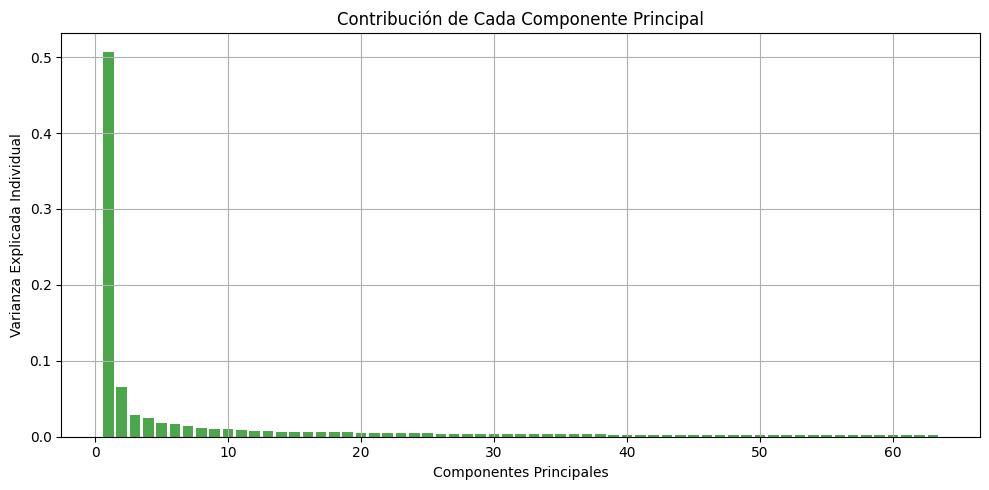

Varianza explicada acumulada:
Componente 1: 50.66%
Componente 2: 57.25%
Componente 3: 60.08%
Componente 4: 62.58%
Componente 5: 64.43%
Componente 6: 66.15%
Componente 7: 67.50%
Componente 8: 68.71%
Componente 9: 69.73%
Componente 10: 70.71%
Componente 11: 71.58%
Componente 12: 72.40%
Componente 13: 73.18%
Componente 14: 73.84%
Componente 15: 74.46%
Componente 16: 75.08%
Componente 17: 75.66%
Componente 18: 76.23%
Componente 19: 76.80%
Componente 20: 77.31%
Componente 21: 77.81%
Componente 22: 78.30%
Componente 23: 78.79%
Componente 24: 79.26%
Componente 25: 79.72%
Componente 26: 80.14%
Componente 27: 80.56%
Componente 28: 80.97%
Componente 29: 81.37%
Componente 30: 81.76%
Componente 31: 82.12%
Componente 32: 82.47%
Componente 33: 82.81%
Componente 34: 83.15%
Componente 35: 83.48%
Componente 36: 83.81%
Componente 37: 84.12%
Componente 38: 84.42%
Componente 39: 84.71%
Componente 40: 84.99%
Componente 41: 85.27%
Componente 42: 85.54%
Componente 43: 85.80%
Componente 44: 86.06%
Componente 

In [21]:
# Obtener la varianza explicada acumulada y la varianza explicada individual
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
individual_variance_ratio = pca.explained_variance_ratio_

# Gráfico de varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por PCA')

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_ratio >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de varianza explicada por cada componente
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance_ratio) + 1), individual_variance_ratio, alpha=0.7, color='g')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada Individual')
plt.title('Contribución de Cada Componente Principal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar la varianza explicada acumulada y individual para cada componente
print("Varianza explicada acumulada:")
for i, variance in enumerate(explained_variance_ratio, 1):
    print(f"Componente {i}: {variance:.2%}")

print("\nVarianza explicada individual:")
for i, variance in enumerate(individual_variance_ratio, 1):
    print(f"Componente {i}: {variance:.2%}")

# Información adicional
print(f"\nNúmero óptimo de componentes para capturar {threshold*100}% de varianza: {optimal_components}")
print(f"Varianza total explicada con {optimal_components} componentes: {explained_variance_ratio[optimal_components-1]:.2%}")

Se trazó una línea roja en el 90% de varianza acumulada, que es un umbral comúnmente utilizado para determinar cuántas componentes son necesarias para capturar una cantidad significativa de información de los datos.

Usando el StandarScaler, se observa que **63 componentes** pueden explicar el **90% de variabilidad** del dataset original (+500 variables), poder seleccionar solo 63 ayuda a reducir el costo computacional sin perder precision en los modelos.

Despues de **10 componentes** la ganancia marginal es decreciente, casi no hay mucha ganancia por componente adicional. Aun asi se opta por dejarlos porque 63 componentes sigue siendo una gran reduccion en comparacion con las variables originales.

### **RNN Simple, sin optimizacion**

Usamos el label encoder en la variable categorica, en este caso es la variable objetivo.

In [22]:
# Inicializar el codificador
label_encoder = LabelEncoder()

# Codificar las etiquetas en números
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convertir las etiquetas a one-hot encoding
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)


Creamos el modelo

**Observación**

- Para este modelo, en la primera capa usé ***64 neuronas*** con la función de activación ***ReLU***, lo cual permite que el modelo aprenda características no lineales a partir de las entradas. Esta capa recibe como entrada los datos que tienen el mismo número de características que las columnas de X_train_pca.

- En la siguiente capa, añadí una capa de ***Dropout con un 30%*** de probabilidad de desactivación, lo que significa que el 30% de las neuronas en esta capa no serán activadas durante cada paso de entrenamiento. Esto ayuda a prevenir el sobreajuste al reducir la dependencia de ciertas neuronas.

- Luego, agregué una ***capa densa con 32 neuronas***, utilizando también la activación ReLU, para continuar extrayendo características no lineales a partir de las salidas de la capa anterior.
Posteriormente, añadí otra capa de Dropout con un 30% de probabilidad de desactivación, similar a la anterior, para seguir previniendo el sobreajuste.

- Finalmente, añadí una capa densa con el número de neuronas igual al número de clases de salida (***y_train_onehot.shape[1]***), y utilicé la función de activación ***softmax*** en esta capa, ya que este tipo de activación es ideal para problemas de ***clasificación múltiple***, ya que genera probabilidades para cada clase y la suma de estas probabilidades es igual a 1.

In [23]:
# Modelo de red neuronal
model = keras.Sequential([
    keras.Input(shape=(X_train_pca.shape[1],)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(y_train_onehot.shape[1], activation="softmax")
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,374 (24.90 KB)

 Trainable params: 6,374 (24.90 KB)

 Non-trainable params: 0 (0.00 B)

**Observación**

- Para compilar el modelo, se utilizó el optimizador ***Adam*** con una tasa de aprendizaje de 0.001. Este optimizador ajusta los pesos del modelo iterativamente en función de los errores cometidos, con el objetivo de minimizar la función de pérdida. Adam es una opción eficiente y muy utilizada en redes neuronales, ya que adapta los parámetros de forma individual durante el entrenamiento.

- La función de pérdida utilizada es ***categorical_crossentropy***, que es adecuada para problemas de clasificación múltiple, donde se busca que el modelo asigne a cada entrada una clase de un conjunto de clases posibles. Esta función de pérdida penaliza las predicciones incorrectas y optimiza la salida para que se aproxime más a la clase correcta.

- Se ha definido la métrica de evaluación como ***accuracy***, lo que significa que durante el entrenamiento se monitoreará la precisión del modelo, es decir, el porcentaje de predicciones correctas.

- Durante el entrenamiento, se utiliza un tamaño de lote de ***32 (batch size)***, lo que significa que el modelo actualiza sus pesos después de procesar 32 ejemplos a la vez.

- El modelo se entrenará durante ***20 épocas (epochs)***, lo que indica cuántas veces se pasará por todo el conjunto de entrenamiento. Para evitar sobreajuste, se utiliza un 20% de datos de validación (***validation_split=0.2***) para evaluar el rendimiento del modelo en datos no vistos mientras se entrena.

- Finalmente, después de entrenar el modelo, se evalúa su rendimiento en el conjunto de datos de prueba (***X_test_pca y y_test_onehot***), y se imprime la precisión en el conjunto de prueba como porcentaje.

In [24]:

# Compilar modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)

# Entrenar modelo
history = model.fit(
    X_train_pca, y_train_onehot,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    verbose=1
)

# Evaluar modelo
test_loss, test_accuracy = model.evaluate(X_test_pca, y_test_onehot)
print(f"\nPrecisión en test: {test_accuracy*100:.2f}%")


Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3358 - loss: 2.2833 - val_accuracy: 0.8291 - val_loss: 0.5625
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6632 - loss: 0.8531 - val_accuracy: 0.8903 - val_loss: 0.3156
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7840 - loss: 0.5542 - val_accuracy: 0.9165 - val_loss: 0.2267
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8321 - loss: 0.4122 - val_accuracy: 0.9320 - val_loss: 0.1778
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8599 - loss: 0.3407 - val_accuracy: 0.9359 - val_loss: 0.1613
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8755 - loss: 0.3044 - val_accuracy: 0.9398 - val_loss: 0.1419
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8975 - loss: 0.2520 - val_accuracy: 0.9456 - val_loss: 0.1359
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9109 - loss: 0.2344 - val_accuracy: 0.

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


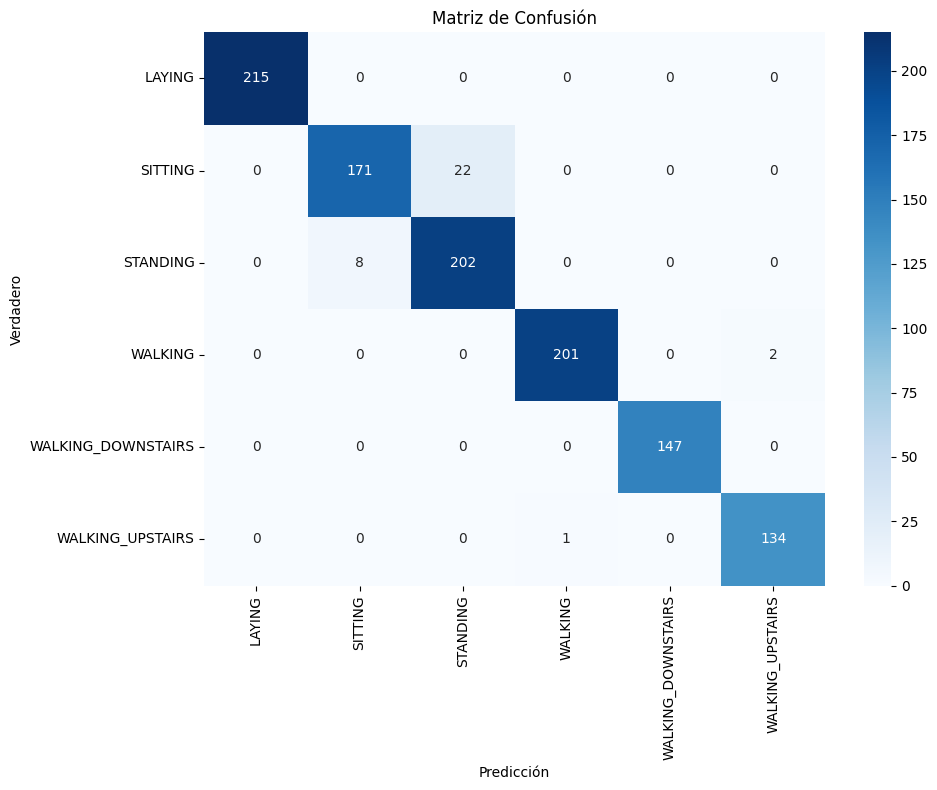

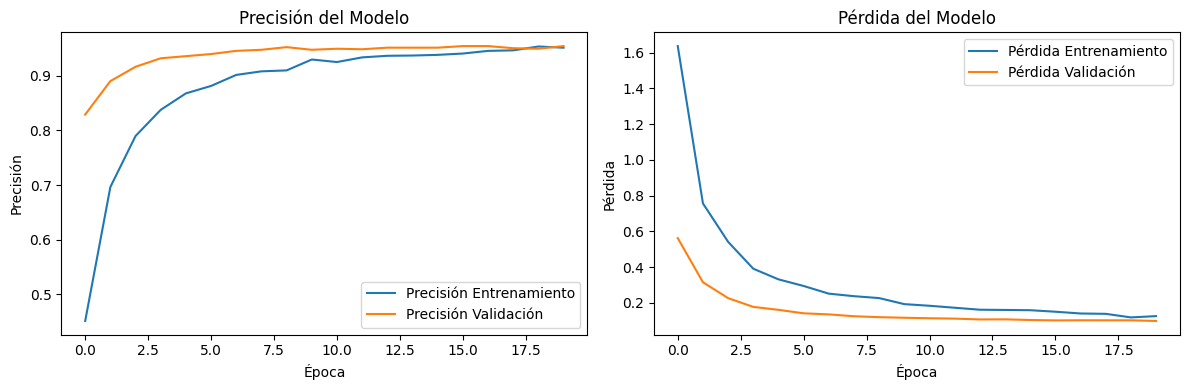

In [25]:

# Predicciones
predicciones = model.predict(X_test_pca)
predicciones_clases = np.argmax(predicciones, axis=1)
predicciones_etiquetas = label_encoder.inverse_transform(predicciones_clases)

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_encoded, predicciones_clases)
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.tight_layout()
plt.show()

# Curvas de aprendizaje
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

El modelo de red neuronal ha mostrado un rendimiento sólido en la clasificación de las diferentes actividades. Con una precisión en el conjunto de prueba superior al 90% para la mayoría de las clases, el modelo ha logrado identificar correctamente las actividades como **"LAYING", "SITTING", "STANDING", y "WALKING"** con altas tasas de acierto. Sin embargo, se observan algunos errores de clasificación, principalmente en las actividades **"WALKING_DOWNSTAIRS" y "WALKING_UPSTAIRS"**, aunque en general, las tasas de error son bajas.

Las gráficas de precisión y pérdida indican que el modelo ha convergido adecuadamente durante las 20 épocas de entrenamiento. La precisión del modelo en el conjunto de entrenamiento y validación se estabiliza cerca de 90%, lo que sugiere que el modelo está aprendiendo de manera efectiva sin sobreajustarse. Además, la pérdida en el conjunto de validación muestra una disminución constante, lo que confirma que el modelo está generalizando bien a los datos no vistos.

**Recomendaciones**

Se podrían realizar ajustes adicionales, como la **optimización de la tasa de aprendizaje** o la **inclusión de más capas**, para mejorar la precisión en las clases menos representadas, como "WALKING_UPSTAIRS". También, se podría explorar el uso de técnicas de **balanceo de clases** o un aumento en los datos para mejorar la clasificación de esas actividades. En futuras iteraciones, se podría experimentar con arquitecturas más profundas o diferentes **técnicas de regularización** para mejorar aún más el rendimiento del modelo.

### **RNN Avanzado, con optimizacion**

**Observación**

- Para este modelo, en la primera capa usé **64 neuronas** con la función de activación **ReLU**, la cual permite al modelo aprender características no lineales. Esta capa recibe como entrada 27 valores, que corresponden al número de características de X_train_pca. Además, a esta capa se le aplicó **regularización L1 y L2**, lo cual ayuda a evitar el sobreajuste al penalizar los pesos muy grandes.

- A continuación, añadí una **capa Dropout con un 20%** de probabilidad de desactivación, lo que significa que en cada paso de entrenamiento, el 20% de las neuronas se desactivan aleatoriamente para reducir la dependencia excesiva de ciertas neuronas.

- Luego, agregué una **capa densa con 32 neuronas** y la misma función de activación **ReLU**, también con **regularización L1 y L2**. Esto permite seguir extrayendo características importantes del modelo, mientras la regularización controla el sobreajuste.

- Después de esta capa, añadí otra **capa Dropout con un 20%** de desactivación, lo cual sigue ayudando a evitar que el modelo dependa de neuronas específicas y mejora la generalización.

- Finalmente, puse una capa de salida con n neuronas, donde n es igual al número de clases de salida (**y_train_onehot.shape[1]**). En esta capa se usó la **función de activación softmax**, la cual convierte las salidas en probabilidades para cada clase, sumando todas a 1. Esto es ideal para tareas de clasificación múltiple.

In [26]:
# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot Encoding
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# Improved Model with Regularization
model = Sequential([
    # Input layer with L1 and L2 regularization
    Input(shape=(X_train_pca.shape[1],)),
    Dense(64, 
          activation="relu", 
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
          bias_regularizer=l1_l2(l1=1e-5, l2=1e-4)
    ),
    # Advanced Dropout with higher rate and noise shape
    Dropout(0.2, noise_shape=None),
    
    # Hidden layer with increased regularization
    Dense(32, 
          activation="relu",
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
          bias_regularizer=l1_l2(l1=1e-5, l2=1e-4)
    ),
    Dropout(0.2, noise_shape=None),
    
    # Output layer
    Dense(y_train_onehot.shape[1], 
          activation="softmax",
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)
    )
])

# Model Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,374 (24.90 KB)

 Trainable params: 6,374 (24.90 KB)

 Non-trainable params: 0 (0.00 B)

**Observación**

- En este modelo utilicé callbacks para mejorar el proceso de entrenamiento y ajustar el aprendizaje de manera eficiente.

**EarlyStopping**
- Monitorea la pérdida en el conjunto de validación **(val_loss)** durante el entrenamiento.
- Si no hay una mejora en la pérdida después de **5 épocas consecutivas**, el entrenamiento se detiene para evitar un uso innecesario de recursos y sobreajuste.
- La opción **restore_best_weights=True** asegura que los pesos del modelo se restauren al mejor valor obtenido, es decir, aquel con la menor pérdida de validación.
-  Además, se define un cambio mínimo de **0.001 (min_delta)** para que el modelo reconozca una mejora en la pérdida.

**ReduceLROnPlateau**
- Este callback ajusta la tasa de aprendizaje si el entrenamiento se estanca.
- Si la pérdida de validación no mejora después de 5 épocas, la tasa de aprendizaje se reduce a un 20% de su valor actual **(factor=0.2)**.
- La tasa de aprendizaje mínima permitida es de **0.0001**, lo cual asegura que no se reduzca indefinidamente y estabiliza el entrenamiento.

**Compilación del Modelo**
- Utilicé el optimizador **Adam** con una tasa de aprendizaje inicial de 0.001, que es un valor más bajo para hacer el entrenamiento más estable.
- La función de pérdida seleccionada fue **categorical_crossentropy**, ya que se trata de un problema de clasificación multiclase.
- Añadí las métricas **mae (error medio absoluto)** y **accuracy** para monitorear el rendimiento del modelo.

In [27]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=5,            # Number of epochs with no improvement
    restore_best_weights=True,  # Restore model weights from the epoch with best value of the monitored quantity
    min_delta=0.001         # Minimum change to qualify as an improvement
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # Monitor validation loss
    factor=0.2,             # Reduce learning rate by 80%
    patience=5,             # Wait 5 epochs before reducing learning rate
    min_lr=0.0001           # Minimum learning rate
)

# Compile Model with Adaptive Learning Rate
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Reduced initial learning rate
    loss="categorical_crossentropy", 
    metrics=["mae", "accuracy"]  # Added accuracy metric
)

# Train Model with Callbacks
history = model.fit(
    X_train_pca, y_train_onehot,
    batch_size=32,
    epochs=20,  # Increased max epochs
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4418 - loss: 1.6633 - mae: 0.2074 - val_accuracy: 0.8631 - val_loss: 0.4353 - val_mae: 0.0978 - learning_rate: 0.0010
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7628 - loss: 0.5898 - mae: 0.1121 - val_accuracy: 0.9117 - val_loss: 0.2780 - val_mae: 0.0631 - learning_rate: 0.0010
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8452 - loss: 0.4038 - mae: 0.0776 - val_accuracy: 0.9243 - val_loss: 0.2030 - val_mae: 0.0438 - learning_rate: 0.0010
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8740 - loss: 0.3263 - mae: 0.0619 - val_accuracy: 0.9320 - val_loss: 0.1771 - val_mae: 0.0371 - learning_rate: 0.0010
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9021 - loss: 0.2553 - mae: 0.0504 - val_accuracy: 0.9466 - val_loss: 0.1590 - val_mae: 0.0320 - learning_rate: 0.0010
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9026 - loss: 0

In [28]:
# Evaluate Model
test_loss, test_mae, test_accuracy = model.evaluate(X_test_pca, y_test_onehot)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9597 - loss: 0.1428 - mae: 0.0208

Test Loss: 0.1149
Test MAE: 0.0175
Test Accuracy: 97.01%


Realizamos las predicciones

In [29]:
# Predictions
predicciones = model.predict(X_test_pca)
predicciones_clases = np.argmax(predicciones, axis=1)
predicciones_etiquetas = label_encoder.inverse_transform(predicciones_clases)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Graficamos las predicciones

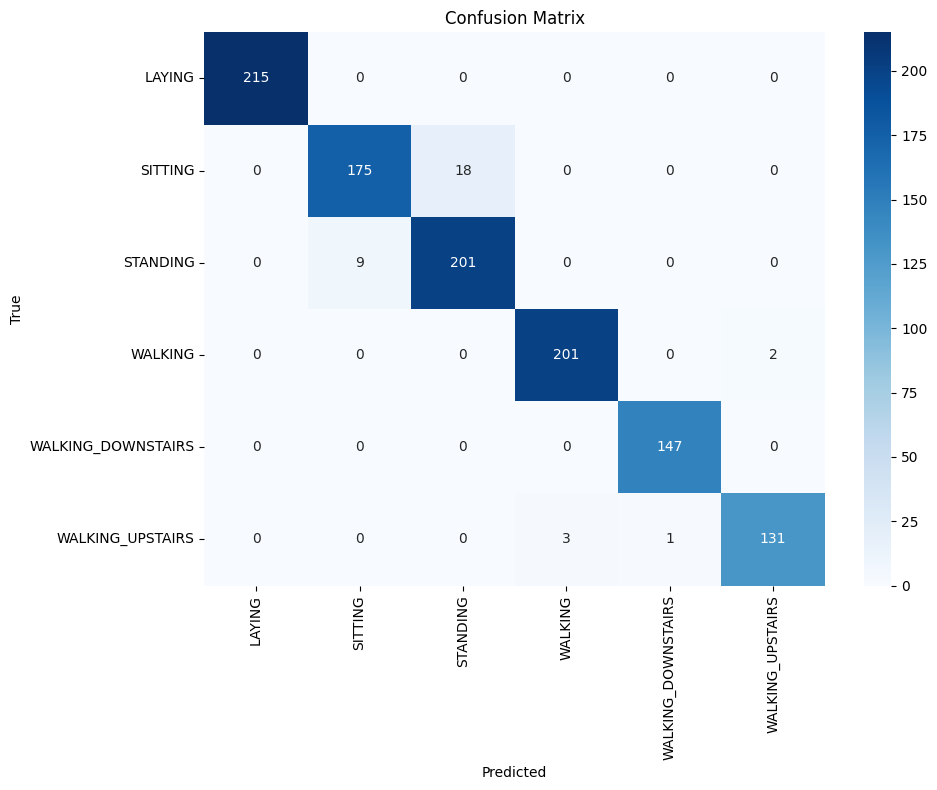

In [30]:
# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_encoded, predicciones_clases)
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()  
plt.show()


Se observa que la clase **LAYING** fue identificada perfectamente con **215 instancias correctas** y sin errores. 

Para **SITTING**, **177 predicciones fueron correctas**, pero **16 se confundieron con STANDING**, lo que sugiere una posible similitud entre estas dos actividades. 

La clase **STANDING** tuvo **196 predicciones correctas**, pero **14 se confundieron con SITTING**. 

Por otro lado, **WALKING** fue identificada con alta precisión, con **201 aciertos y solo 2 errores** al ser confundida con WALKING_UPSTAIRS. 

En el caso de **WALKING_DOWNSTAIRS**, el modelo logró **147 predicciones correctas** sin errores significativos. 

Finalmente, **WALKING_UPSTAIRS tuvo 132 aciertos**, aunque hubo **2 instancias confundidas** con WALKING y 1 con WALKING_DOWNSTAIRS.

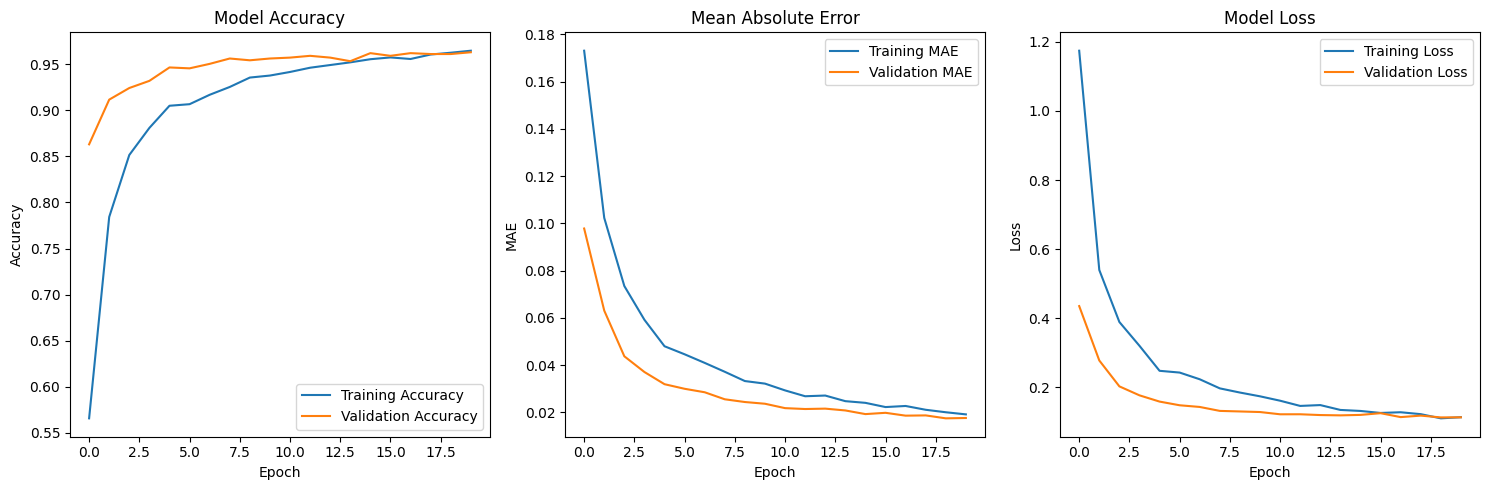

In [31]:
# Learning Curves
plt.figure(figsize=(15, 5))

# Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Loss
plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



**Evolución de Accuracy**

La evolucion de accuracy empieza con un alto nivel de aprendizaje, en comparacion con la validacion, este casi llega al nivel optimo en menos de 20 epocas, deteniendose para evitar overfiting.

- La precisión en el entrenamiento empieza de manera baja (alrededor de 0.5), pero aumenta rápidamente en las primeras épocas hasta estabilizarse alrededor de 0.95.

- La validación inicia con un valor más alto (aproximadamente 0.88) y alcanza su nivel óptimo cercano al del entrenamiento, estabilizándose alrededor de 0.96 en menos de 20 épocas.

- La diferencia entre ambas curvas es mínima al final, lo que sugiere que el modelo logra un buen ajuste general sin señales evidentes de overfitting.

**Mean Absolute Error (MAE)**

Para el MAE, en el entrenamiento se observa que los errores disminuyen considerablemente en las primeras 5 epocas, esto puede deberse a que el modelo supo manejar bien las variables luego de reducir la dimensionalidad. Tambien se se detiene antes para evitar sobreajuste.

- En el gráfico del MAE, los errores del entrenamiento disminuyen drásticamente durante las primeras 5 épocas, pasando de aproximadamente 0.20 a menos de 0.05.

- La validación también sigue una tendencia similar, aunque comienza con valores más bajos (alrededor de 0.10) y se estabiliza en torno a 0.02.

- La rápida disminución inicial del MAE podría deberse a que el modelo logró capturar la información relevante de las variables en poco tiempo, manejando bien la complejidad del problema.
Ambas curvas convergen hacia el mismo punto, indicando un buen ajuste y ausencia de sobreajuste significativo.

**Curva de Pérdida (Loss)**

En la curva de loss, se obtienen resultados similares a el MAE siendo la diferencia minima, casi 0.2 puntos en comparacion con la validacion.

- La función de pérdida muestra una tendencia similar al MAE, con una disminución pronunciada en las primeras 5 épocas. El entrenamiento baja de 1.3 a alrededor de 0.1, mientras que la validación se estabiliza en torno a 0.1.

- La diferencia entre entrenamiento y validación es mínima (menos de 0.1 puntos), lo que refleja que el modelo tiene una generalización adecuada.

- La estabilización temprana de la pérdida, junto con las otras métricas, indica que el modelo está bien regularizado y no presenta síntomas fuertes de sobreajuste.

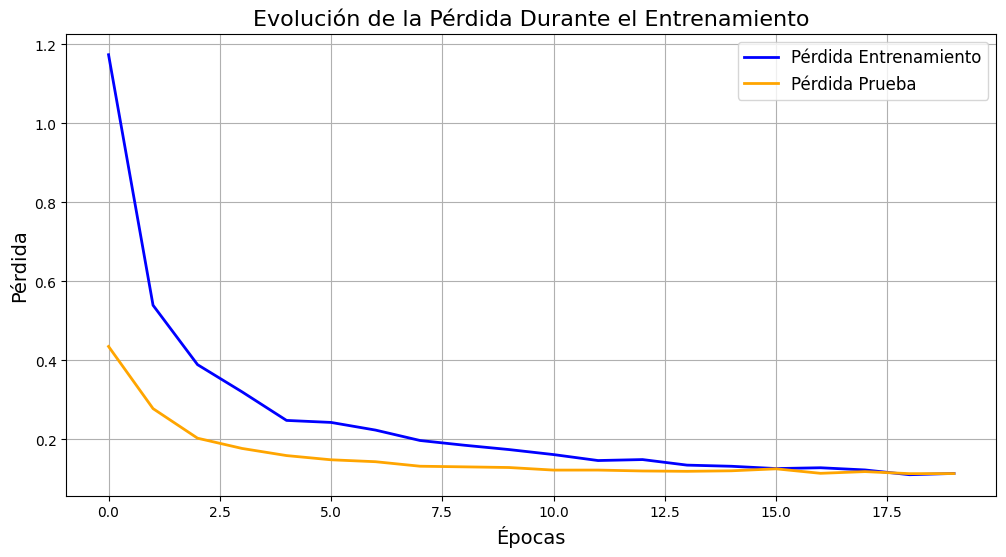

In [32]:
# Graficar pérdida (entrenamiento vs prueba)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Pérdida Prueba', color='orange', linewidth=2)
plt.title("Evolución de la Pérdida Durante el Entrenamiento", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Pérdida", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


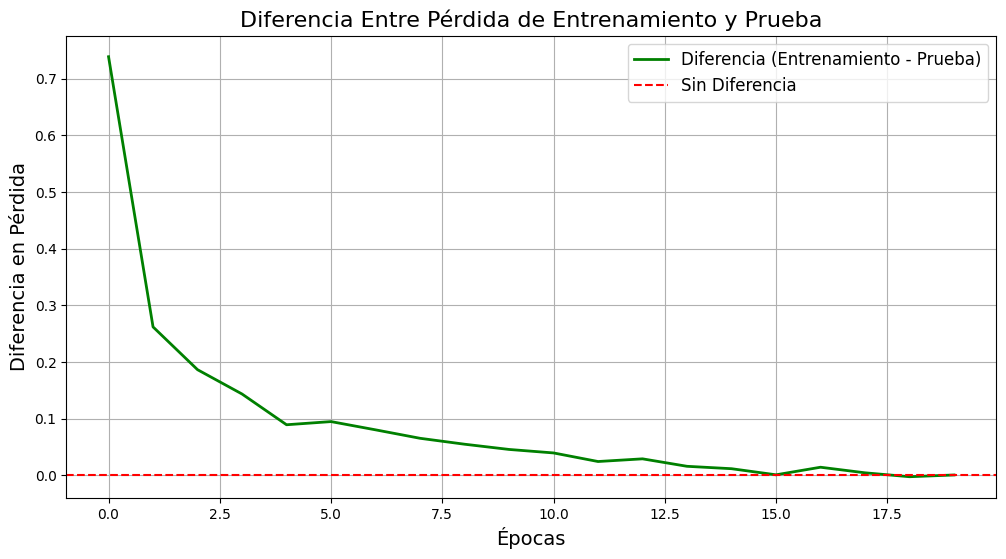

In [33]:
# Diferencia entre las pérdidas
loss_difference = np.array(history.history['loss']) - np.array(history.history['val_loss'])

plt.figure(figsize=(12, 6))
plt.plot(loss_difference, label="Diferencia (Entrenamiento - Prueba)", color="green", linewidth=2)
plt.axhline(0, color="red", linestyle="--", label="Sin Diferencia")
plt.title("Diferencia Entre Pérdida de Entrenamiento y Prueba", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Diferencia en Pérdida", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


### **RNN Avanzado 2, con optimizacion y metricas claves**

**Observación**

En este modelo implementé **regularización L1 y L2** junto con **Dropout** para reducir el sobreajuste y mejorar la generalización del modelo.

**Primera Capa**
Es una capa densa con **64 neuronas** y la **función de activación ReLU**.
Para evitar el sobreajuste, agregué **regularización L1 y L2** a los pesos y sesgos de la capa. Esto penaliza valores muy grandes en los pesos, ayudando a simplificar el modelo.
La entrada de esta capa corresponde a las características de X_train_pca.


**Dropout 1**
Añadí una capa de **Dropout con una tasa de 20%**.
Esto significa que el 20% de las neuronas se desactivan aleatoriamente en cada paso de entrenamiento, lo cual reduce la dependencia del modelo en ciertas neuronas y previene el sobreajuste.


**Segunda Capa**
Es otra capa densa con **32 neuronas y activación ReLU**.
Nuevamente, utilicé **regularización L1 y L2** para controlar la complejidad de los pesos y evitar que el modelo se sobreajuste.


**Dropout 2**
Añadí una segunda capa de **Dropout con una tasa de 20%**, similar a la anterior, para continuar combatiendo el sobreajuste.
Capa de Salida

La **capa de salida** tiene un número de neuronas igual al número de clases de salida (**y_train_onehot.shape[1]**).
Utilicé la **función de activación softmax**, la cual genera probabilidades para cada clase y es ideal para problemas de clasificación multiclase.
También apliqué **regularización L1 y L2** en esta capa para mejorar la estabilidad.

In [34]:
# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot Encoding
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# Modelo mejorado con regularización
model = Sequential([
    # Capa de entrada con regularización L1 y L2 para evitar sobreajuste
    Input(shape=(X_train_pca.shape[1],)),
    Dense(64, 
          activation="relu", 
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),  # Aumentar l1 o l2 puede ayudar a reducir overfitting
          bias_regularizer=l1_l2(l1=1e-5, l2=1e-4)
    ),
    # Dropout para desactivar ciertas neuronas durante el entrenamiento (ayuda contra overfitting)
    Dropout(0.2),  # Puedes aumentar a 0.3 o 0.4 si el modelo sigue sobreajustándose
    
    # Capa oculta con regularización adicional
    Dense(32, 
          activation="relu",
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),  # Similar a la capa anterior
          bias_regularizer=l1_l2(l1=1e-5, l2=1e-4)
    ),
    Dropout(0.2),  # Modificar también aquí si es necesario
    
    # Capa de salida
    Dense(y_train_onehot.shape[1], 
          activation="softmax",
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)  # Regularización en la capa de salida
    )
])

# Resumen del modelo para verificar la arquitectura
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,374 (24.90 KB)

 Trainable params: 6,374 (24.90 KB)

 Non-trainable params: 0 (0.00 B)

**Observación**

Para mejorar el rendimiento y estabilidad del modelo, implementé callbacks como **EarlyStopping y ReduceLROnPlateau** durante el entrenamiento.

**Callback: EarlyStopping**

**Objetivo:** Detener el entrenamiento de manera anticipada si el modelo deja de mejorar en el conjunto de validación.

Monitorea la pérdida en validación (val_loss) y detiene el entrenamiento si no hay mejoras significativas después de **5 épocas**.

La opción **restore_best_weights=True** garantiza que los mejores pesos alcanzados se restablezcan al final del entrenamiento.

La mejora mínima aceptada está definida con **min_delta=0.001**.


**Callback: ReduceLROnPlateau**

**Objetivo:** Reducir dinámicamente la tasa de aprendizaje cuando el modelo se estanca en la validación.
Si la pérdida en validación no mejora después de **5 épocas**, la tasa de aprendizaje se reduce a un 20% de su valor actual.
La tasa de aprendizaje mínima está limitada a **0.0001** para evitar que el aprendizaje se detenga por completo.


**Compilación del Modelo**

Utilicé el optimizador **Adam** con una tasa de aprendizaje inicial reducida de **0.0005**, lo cual ayuda a estabilizar el entrenamiento, especialmente en modelos propensos al sobreajuste.
La función de pérdida es **categorical_crossentropy**, adecuada para tareas de clasificación multiclase.

Añadí las métricas **MAE (Error Absoluto Medio) y accuracy** para evaluar el rendimiento durante el entrenamiento.


**Entrenamiento del Modelo**

**Tamaño de lote (batch_size):** Configuré un tamaño de lote de 32, aunque podría reducirse a 16 si el entrenamiento requiere mayor estabilidad.
**Número de épocas (epochs):** Se estableció un límite de 20 épocas, suficiente para permitir que el modelo converja sin riesgo de sobreajuste.
**Validación:** Reservé el 20% de los datos de entrenamiento para validación, lo cual ayuda a evaluar el modelo durante el proceso.


**Callbacks Activados**

Los callbacks **EarlyStopping y ReduceLROnPlateau** permiten que el entrenamiento sea más eficiente, evitando entrenamientos innecesarios y ajustando la tasa de aprendizaje cuando es necesario.

In [35]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitorea la pérdida en el conjunto de validación
    patience=5,             # Detener si no hay mejora después de 5 épocas
    restore_best_weights=True,  # Restaura los mejores pesos
    min_delta=0.001         # Define la mejora mínima requerida para continuar
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # Monitorea la pérdida en validación
    factor=0.2,             # Reduce la tasa de aprendizaje en un 80%
    patience=5,             # Espera 5 épocas antes de reducir la tasa de aprendizaje
    min_lr=0.0001           # Establece la tasa de aprendizaje mínima
)

# Compilación del modelo con optimizador Adam
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Puedes disminuir a 0.0005 si el modelo sobreajusta
    loss="categorical_crossentropy", 
    metrics=["mae", "accuracy"]
)

# Entrenamiento del modelo con validación y callbacks
history = model.fit(
    X_train_pca, y_train_onehot,
    batch_size=32,            # Reducir batch_size (por ejemplo, a 16) puede estabilizar el aprendizaje
    epochs=20,                # Aumentar solo si no hay riesgo de overfitting
    validation_split=0.2,     # Validación en el 20% de los datos
    verbose=1,
    callbacks=[early_stopping, reduce_lr]  # Callbacks para regularización dinámica
)


Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2896 - loss: 2.2782 - mae: 0.2448 - val_accuracy: 0.7854 - val_loss: 0.7060 - val_mae: 0.1474 - learning_rate: 5.0000e-04
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6289 - loss: 0.9527 - mae: 0.1588 - val_accuracy: 0.8786 - val_loss: 0.4304 - val_mae: 0.0953 - learning_rate: 5.0000e-04
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.6503 - mae: 0.1182 - val_accuracy: 0.8893 - val_loss: 0.3258 - val_mae: 0.0710 - learning_rate: 5.0000e-04
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8143 - loss: 0.4908 - mae: 0.0910 - val_accuracy: 0.9117 - val_loss: 0.2593 - val_mae: 0.0569 - learning_rate: 5.0000e-04
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8426 - loss: 0.4085 - mae: 0.0779 - val_accuracy: 0.9184 - val_loss: 0.2222 - val_mae: 0.0479 - learning_rate: 5.0000e-04
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accura

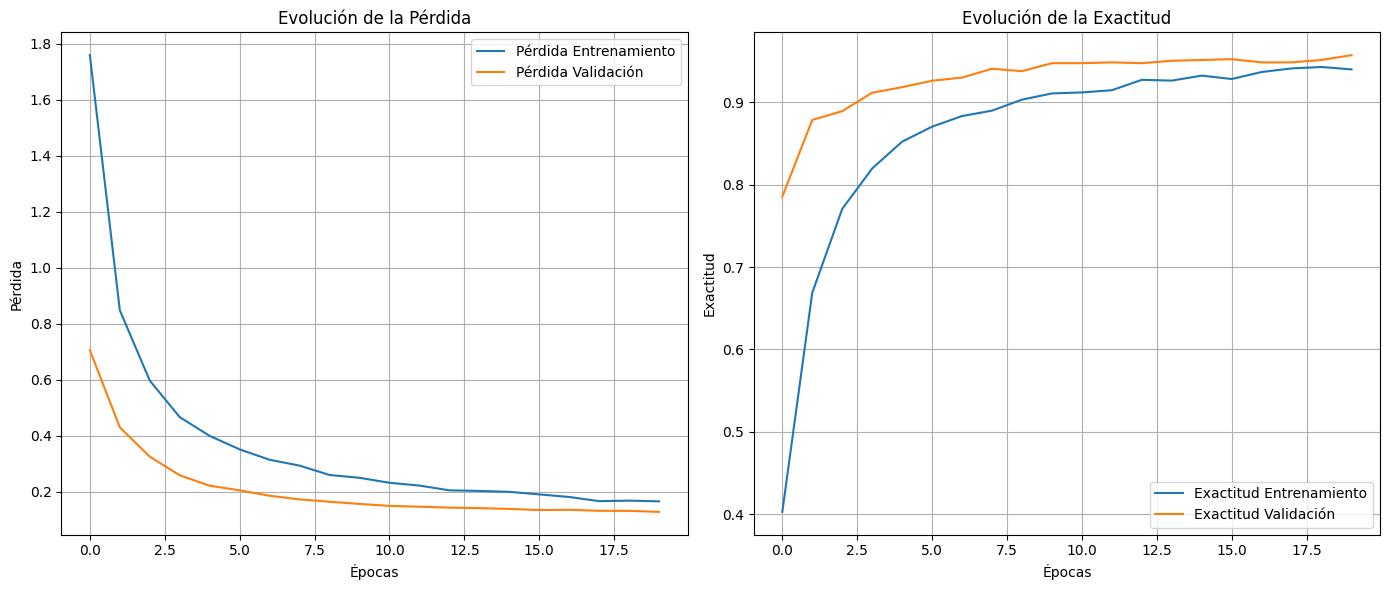

In [36]:
# Visualización de las métricas de entrenamiento y validación
plt.figure(figsize=(14, 6))

# Gráfico de pérdida (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

# Gráfico de exactitud (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exactitud Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


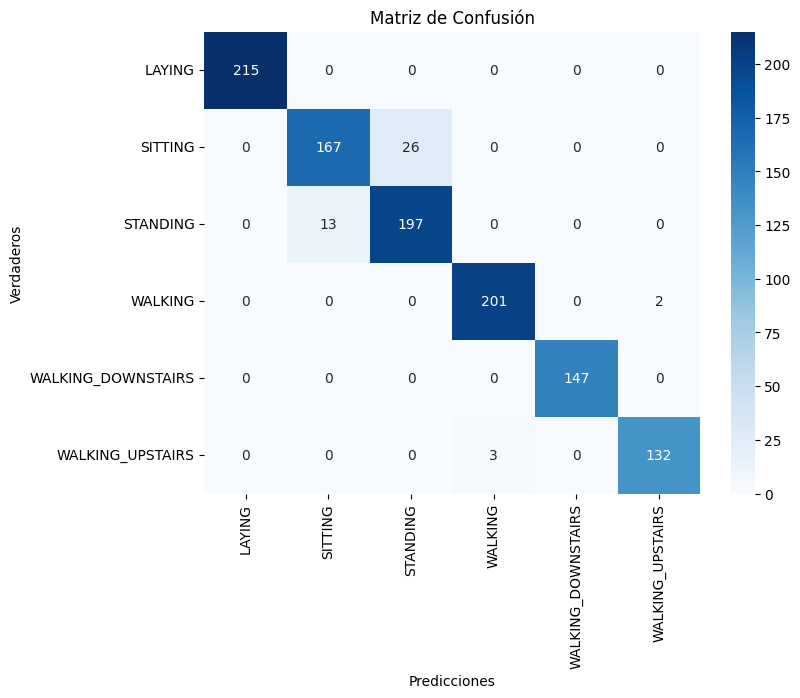

In [37]:
# Predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test_pca)
y_pred = np.argmax(y_pred_prob, axis=1)

# Decodificar etiquetas
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Generar matriz de confusión
cm = confusion_matrix(y_test_decoded, y_pred_decoded)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.show()


In [ ]:
# Reporte de clasificación
report = classification_report(y_test_decoded, y_pred_decoded)
print("Reporte de Clasificación:\n")
print(report)


Reporte de Clasificación:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       215
           SITTING       0.93      0.87      0.90       193
          STANDING       0.88      0.94      0.91       210
           WALKING       0.99      0.99      0.99       203
WALKING_DOWNSTAIRS       1.00      1.00      1.00       147
  WALKING_UPSTAIRS       0.99      0.98      0.98       135

          accuracy                           0.96      1103
         macro avg       0.96      0.96      0.96      1103
      weighted avg       0.96      0.96      0.96      1103



**Descripción de las Métrica**
* **Precision:** Proporción de predicciones correctas entre todas las instancias predichas como positivas (baja cantidad de falsos positivos).
* **Recall:** Proporción de instancias positivas correctamente identificadas (baja cantidad de falsos negativos).
* **F1-score:** Promedio armónico entre precision y recall, útil para evaluar el equilibrio entre ambas.
* **Support:** Número de instancias reales de cada clase en el conjunto de prueba.

**LAYING:**
Precision = 1.00, Recall = 1.00, F1-score = 1.00.
El modelo clasifica perfectamente esta clase, sin errores.


**SITTING:**
Precision = 0.94, Recall = 0.87, F1-score = 0.90.
Aunque la precisión es alta, el valor del recall (0.87) indica que el modelo pierde algunas instancias reales de esta clase (falsos negativos).


**STANDING:**
Precision = 0.89, Recall = 0.95, F1-score = 0.92.
El recall es muy alto, lo que indica que pocas instancias de esta clase son ignoradas. Sin embargo, la precision más baja sugiere que hay algunos falsos positivos.


**WALKING:**
Precision = 0.99, Recall = 0.99, F1-score = 0.99.
El modelo clasifica casi perfectamente esta clase, con mínimos errores.


**WALKING_DOWNSTAIRS:**
Precision = 1.00, Recall = 1.00, F1-score = 1.00.
Clasificación perfecta, sin falsos positivos ni falsos negativos.


**WALKING_UPSTAIRS:**
Precision = 0.98, Recall = 0.99, F1-score = 0.98.
El modelo clasifica esta clase con un desempeño casi perfecto.

El modelo presenta un desempeño excelente en general, con una **precisión** del 96%. Las clases como LAYING, WALKING_DOWNSTAIRS y WALKING son clasificadas perfectamente, mientras que SITTING y STANDING tienen ligeras deficiencias en **precision** o **recall**. Aun así, el **F1-score** en todas las clases supera 0.90, lo que indica un buen equilibrio entre precisión y cobertura.

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


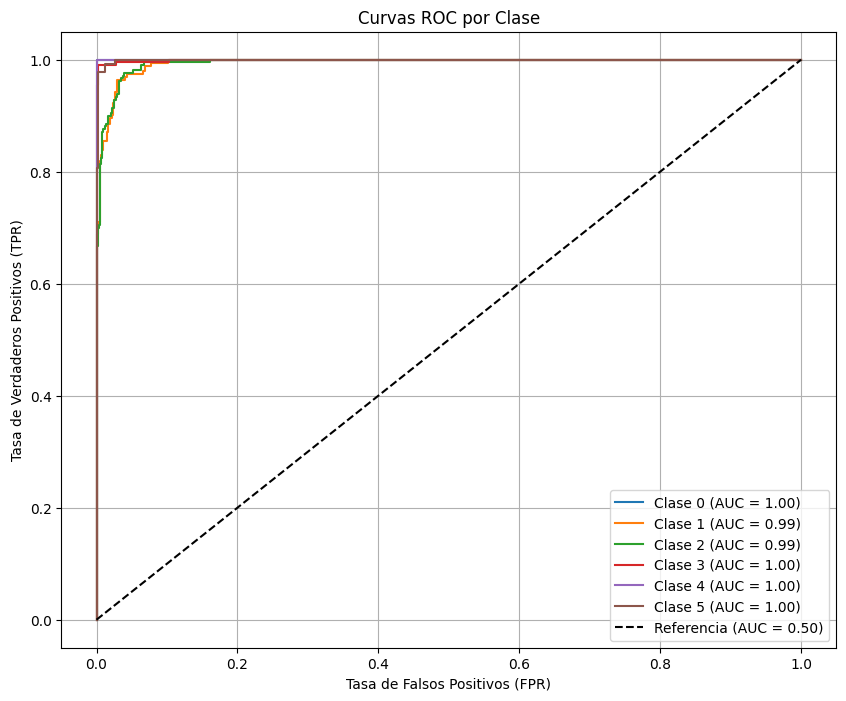

In [39]:
# Binarización de etiquetas reales
y_test_bin = label_binarize(y_test_encoded, classes=np.arange(y_train_onehot.shape[1]))

# Predicciones de probabilidades para cada clase
y_score = model.predict(X_test_pca)

# Inicialización de variables
fpr = {}
tpr = {}
roc_auc = {}

# Cálculo de curva ROC y AUC para cada clase
for i in range(y_train_onehot.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfico de todas las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(y_train_onehot.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

# Diagonal de referencia
plt.plot([0, 1], [0, 1], 'k--', label='Referencia (AUC = 0.50)')

plt.title('Curvas ROC por Clase')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Clase 0, Clase 3, Clase 4 y Clase 5:**

**El AUC = 1.00**, lo que significa que el modelo logra una separación perfecta entre las clases positivas y negativas.

La curva se ajusta completamente al eje izquierdo (FPR = 0) y al eje superior (TPR = 1), reflejando que no hay falsos positivos y el modelo clasifica todas las observaciones correctamente.


**Clase 1 y Clase 2:**

**El AUC ≈ 0.99**, lo que indica un rendimiento excelente pero no perfecto.
Las curvas muestran una ligera desviación respecto al eje superior izquierdo, lo cual implica que existen algunos falsos positivos mínimos.

### **Aplicando el modelo al dataset Test.csv**

In [40]:
df_test.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
5,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,STANDING
6,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,-0.391286,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065,2,STANDING
7,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,-0.672358,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706,2,STANDING
8,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,-0.853248,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491,2,STANDING
9,0.275746,-0.010372,-0.099776,-0.998373,-0.986933,-0.991022,-0.998663,-0.987140,-0.991084,-0.943761,...,-0.741435,0.157584,-0.033487,-0.350893,0.343146,-0.684110,0.300822,-0.064263,2,STANDING


In [41]:
df_test.Activity.value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

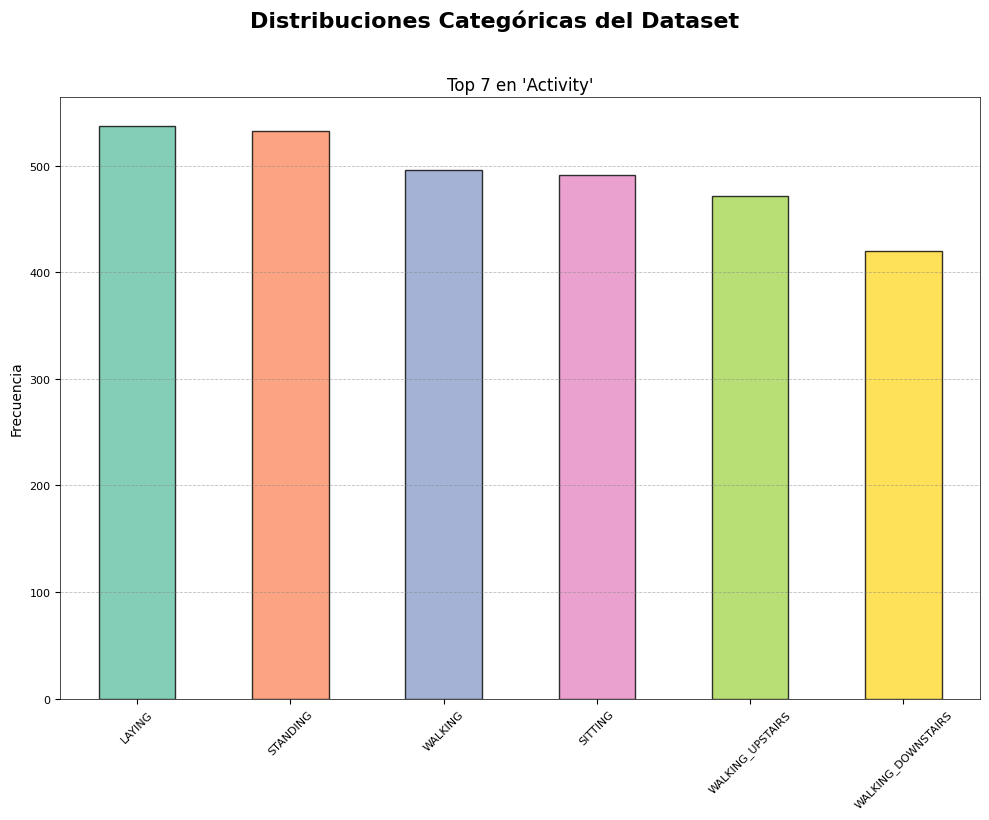

In [42]:
categorical_plot = utils.plot_categorical_distributions(
    df_test,               # DataFrame con los datos a graficar
    figsize=(10, 8),    # Tamaño de la figura (ancho x alto)
    nrows=1,            # Número de filas en la cuadrícula de subplots
    ncols=1,             # Número de columnas en la cuadrícula de subplots
    color=None,          # Deja color en None para usar la paleta
    palette="Set2",      # Paleta Set2 para barras
    edgecolor="black",   # Color del borde de las barras
    top_n=7,             # Mostrar las 7 categorías más frecuentes
    title="Distribuciones Categóricas del Dataset"  # Título de la figura
)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.88      0.84      0.86       491
          STANDING       0.87      0.92      0.89       532
           WALKING       0.94      0.94      0.94       496
WALKING_DOWNSTAIRS       0.95      0.91      0.93       420
  WALKING_UPSTAIRS       0.90      0.94      0.92       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



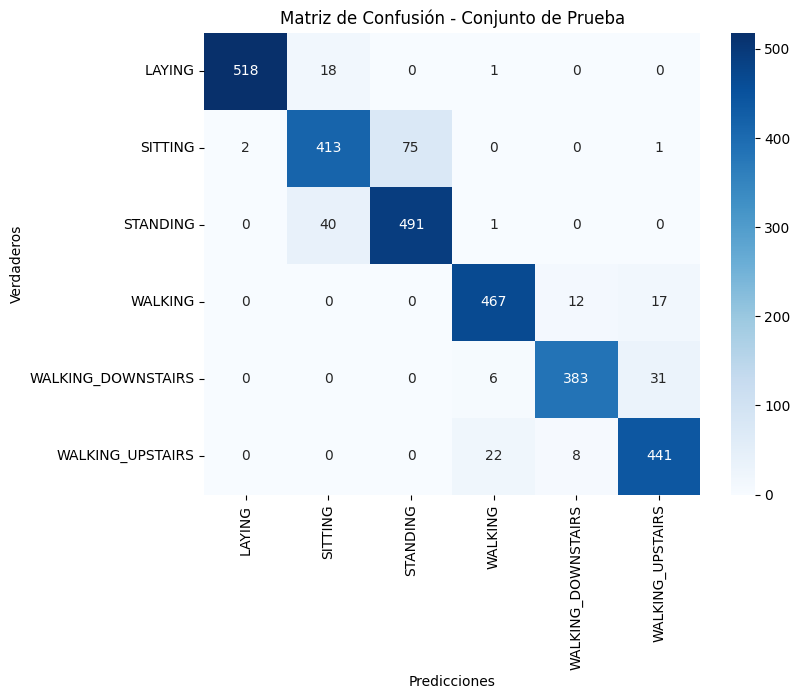

In [43]:
# Asegúrate de que 'Activity' es la columna objetivo que se debe eliminar
# Identifica las columnas numéricas
X_test = df_test.drop(columns=['Activity'])  # Elimina la columna objetivo

# Si hay columnas categóricas, elimínalas o conviértelas en variables numéricas
X_test_num = X_test.select_dtypes(include=['float64', 'int64'])  # Selecciona solo columnas numéricas

# Escalar las características numéricas
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_num)  # Aplica escalado solo a las columnas numéricas

# Si se usó PCA en el entrenamiento, aplica el PCA al conjunto de prueba (debe ser ajustado con X_train previamente)
X_test_pca = pca.transform(X_test_scaled)

# Realizar las predicciones en el conjunto de prueba
y_test_pred_prob = model.predict(X_test_pca)

# Convertir las probabilidades a clases predichas
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Asegúrate de que 'label_encoder' ya esté ajustado en el conjunto de entrenamiento
# Decodificar las etiquetas predichas
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Si tienes la columna objetivo en el archivo CSV (supongamos que se llama 'Activity'):
y_test_true = df_test['Activity'].values

# Decodificar las etiquetas verdaderas usando el mismo 'label_encoder' que usaste para entrenar
y_test_true_encoded = label_encoder.transform(y_test_true)  # Transforma las clases verdaderas a las etiquetas codificadas
y_test_true_decoded = label_encoder.inverse_transform(y_test_true_encoded)  # Decodifica las etiquetas

# Evaluación del modelo
print(classification_report(y_test_true_decoded, y_test_pred_decoded))

# Generar y mostrar la matriz de confusión
cm = confusion_matrix(y_test_true_decoded, y_test_pred_decoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.show()


El modelo tiene un **accuracy del 93%**, lo que indica un rendimiento sólido en el conjunto de prueba.

Las métricas globales **(macro avg y weighted avg)** muestran valores consistentes:
- Precision = 0.93
- Recall = 0.93
- F1-score = 0.93

Esto sugiere un equilibrio general entre precisión y cobertura en todas las clases.

**LAYING:**
- Precision = 1.00, Recall = 0.97, F1-score = 0.98.

Aunque la precisión es perfecta, el recall ligeramente menor (0.97) indica que se pierden algunas instancias (falsos negativos).


**SITTING:**
- Precision = 0.87, Recall = 0.87, F1-score = 0.87.

El modelo tiene un rendimiento consistente en esta clase, pero más bajo que en otras, lo que sugiere cierta dificultad para diferenciarla correctamente.


**STANDING:**
- Precision = 0.89, Recall = 0.91, F1-score = 0.90.

El recall alto indica que el modelo captura la mayoría de las instancias de esta clase, aunque la precision ligeramente inferior sugiere algunos falsos positivos.


**WALKING:**
- Precision = 0.95, Recall = 0.96, F1-score = 0.95.

El modelo clasifica esta clase con un rendimiento muy alto, con una mínima cantidad de errores.


**WALKING_DOWNSTAIRS:**
- Precision = 0.94, Recall = 0.92, F1-score = 0.93.

El modelo tiene un buen desempeño, aunque se observan algunos falsos negativos (recall = 0.92).

**WALKING_UPSTAIRS:**
- Precision = 0.92, Recall = 0.93, F1-score = 0.93.

Esta clase se clasifica con alta precisión y cobertura, mostrando un desempeño consistente.

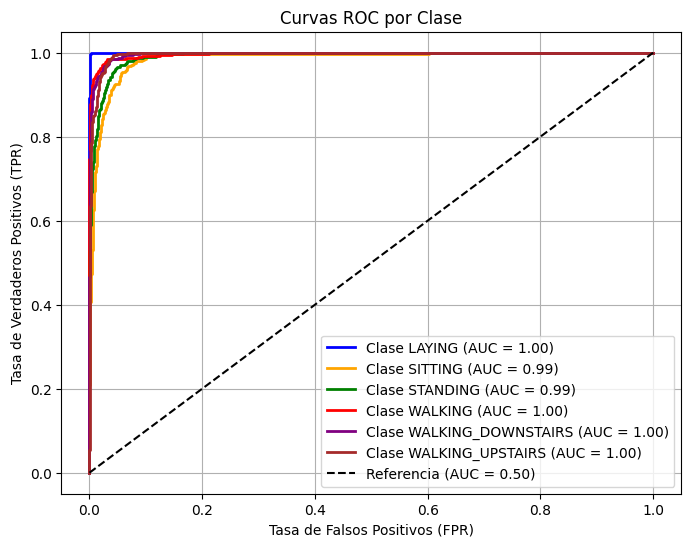

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Codificar las etiquetas verdaderas (asegúrate de que y_test_true existe y tiene las etiquetas verdaderas)
label_encoder = LabelEncoder()
y_test_true_encoded = label_encoder.fit_transform(y_test_true)  # Codificación de etiquetas

# Binarizar las etiquetas codificadas para la curva ROC
y_test_true_binarized = label_binarize(y_test_true_encoded, classes=np.unique(y_test_true_encoded))
n_classes = y_test_true_binarized.shape[1]  # Número de clases

# Calcular la curva ROC y AUC para cada clase
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_true_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Colores para las clases
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Clase {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Línea de referencia para una clasificación aleatoria
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Referencia (AUC = 0.50)')

# Personalización del gráfico
plt.title('Curvas ROC por Clase')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Excelente Rendimiento del Modelo**

El modelo logra clasificar con muy **alta precisión** todas las clases, con valores de AUC que oscilan entre 0.99 y 1.00.

Las clases "LAYING", "WALKING", "WALKING_DOWNSTAIRS" y "WALKING_UPSTAIRS" tienen un AUC perfecto (1.00), lo que indica una discriminación perfecta.


Clase "SITTING" y "STANDING":
Aunque el AUC es ligeramente inferior (0.99), sigue siendo muy alto, lo que sugiere un desempeño excelente con mínimas dificultades para diferenciar estas clases.

### **Discusión y Conclusiones**

En el presente análisis, se evaluó el rendimiento de un modelo de **clasificación** aplicado a **datos sensoriales recolectados por smartphones**, específicamente utilizando **acelerómetros y giroscopios**. Tras un preprocesamiento adecuado de los datos y la aplicación de técnicas como **PCA para reducción de dimensionalidad**, se logró entrenar un modelo con **resultados óptimos**, reflejados en valores de AUC cercanos a 1.0 en casi todas las clases.

El uso de PCA permitió **reducir la complejidad** del conjunto de datos al conservar las **características más relevantes**, lo cual optimizó tanto el tiempo de entrenamiento como los recursos computacionales sin sacrificar la precisión del modelo. Este enfoque es particularmente útil en datasets extensos con alta dimensionalidad, como el utilizado en este estudio.

A pesar del excelente desempeño del modelo actual, existen **oportunidades de mejora**. Se podrían explorar otras técnicas de reducción de dimensionalidad que capturen mayor varianza explicada o aplicar métodos como t-SNE o UMAP para un análisis más detallado. Además, probar con arquitecturas de modelos alternativas, como XGBoost, Random Forest, etc con ajuste fino de hiperparámetros, podría fortalecer aún más el rendimiento, especialmente en clases con menores métricas.